In [ ]:
import numpy as np
import pandas as pd # imports the pandas library, making it available through the 'pd' alias
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [ ]:
candy_data = pd.read_csv('candy-data.csv') # pd is now recognized and the code should work as expected
candy_data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


# **Field	Description**
competitorname - The name of the candy

chocolate -	Does it contain chocolate?

fruity - Is it fruit flavored?

caramel	- Is there caramel in the candy?

peanutalmondy	- Does it contain peanuts, peanut butter or almonds?

nougat	- Does it contain nougat?

crispedricewafer	- Does it contain crisped rice, wafers, or a cookie component?

hard	- Is it a hard candy?

bar	- Is it a candy bar?

pluribus	- Is it one of many candies in a bag or box?

sugarpercent	- The percentile of sugar it falls under within the data set

pricepercent	- The unit price percentile compared to the rest of the set

winpercent	- The overall win percentage according to 269,000 matchups


In [ ]:
candy_data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [ ]:
y = candy_data['sugarpercent']
x1 = candy_data['winpercent']

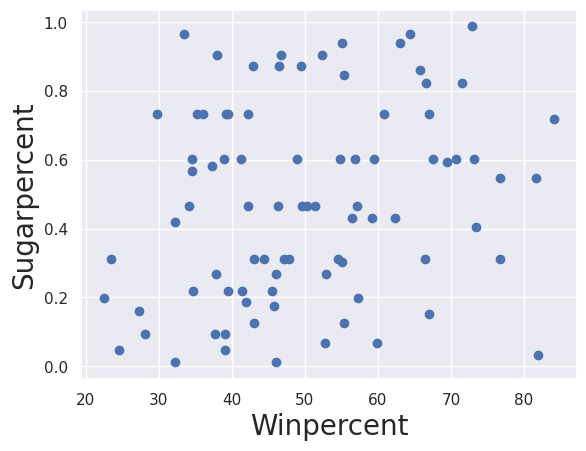

In [ ]:
plt.scatter(x1,y)
plt.xlabel('Winpercent', fontsize = 20)
plt.ylabel('Sugarpercent', fontsize = 20)
plt.show()

X-Axis (Sugar Percentage): Shows the sugar content in the candy.

Y-Axis (Win Percentage): Shows the win percentage, indicating the popularity or preference for the candy.

In [ ]:
import statsmodels.api as sm # Import the statsmodels.api module and assign it to the variable sm

x = sm.add_constant(x1) # Now 'sm' is defined and can be used to call the add_constant function
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sugarpercent   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.600
Date:                Wed, 27 Nov 2024   Prob (F-statistic):             0.0349
Time:                        09:23:39   Log-Likelihood:                -10.451
No. Observations:                  85   AIC:                             24.90
Df Residuals:                      83   BIC:                             29.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2571      0.108      2.389      0.019       0.043       0.471
winpercent     0.0044      0.002      2.145      0.035       0.000       0.008
==============================================================================
Omnibus:                       11.096   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.727
Skew:                           0.131   Prob(JB):                        0.155
Kurtosis:                       2.008   Cond. No.                         188.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

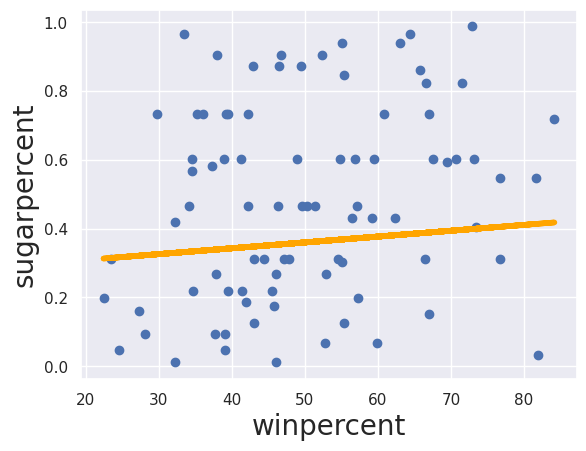

In [ ]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('winpercent', fontsize = 20)
plt.ylabel('sugarpercent', fontsize = 20)
plt.show()

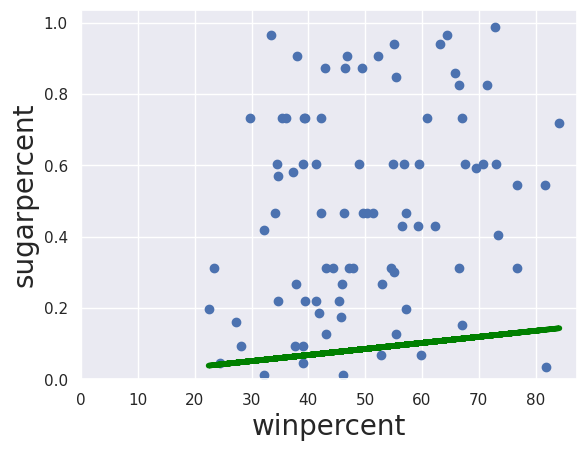

In [ ]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0
fig = plt.plot(x1,yhat, lw=4, c='green', label ='regression line')
plt.xlabel('winpercent', fontsize = 20)
plt.ylabel('sugarpercent', fontsize = 20)
plt.xlim(0)
plt.ylim(0)
plt.show()

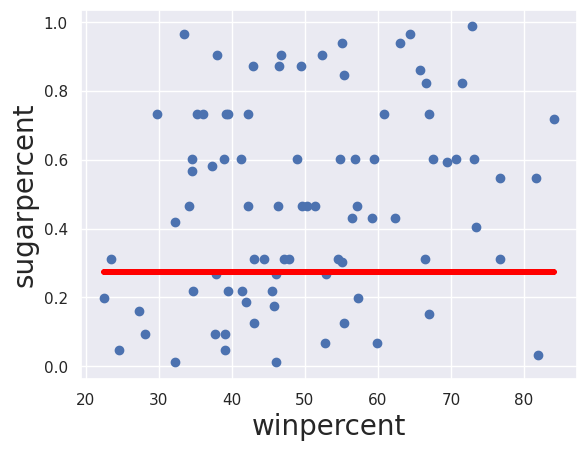

In [ ]:
plt.scatter(x1,y)
yhat = 0*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='red', label ='regression line')
plt.xlabel('winpercent', fontsize = 20)
plt.ylabel('sugarpercent', fontsize = 20)
plt.show()